In [1]:
import pandas as pd
from config import *
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
day_step = 5

In [3]:
file_path_list = []
data_path = "data/"
for (root, dirs, file) in os.walk(data_path):
    for f in file:
        if '.csv' in f:
            file_path_list.append(root+'/'+f)
len(file_path_list)

18

In [4]:
file_path = file_path_list[0]


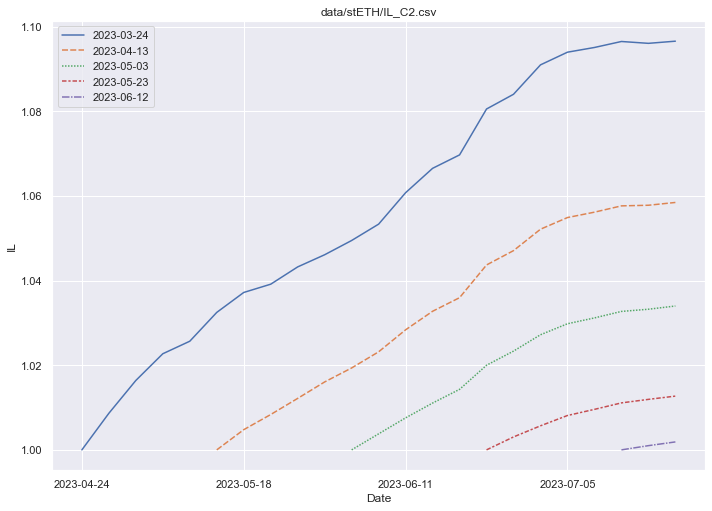

In [5]:
for file_path in file_path_list:
    df = pd.read_csv(file_path, index_col=False).transpose()
    df = df.drop(df.index[0])

    small_df = df[range(0,len(df), day_step)]
    date = pd.date_range("2023-03-24", freq=f"{DAY_DELTA*day_step}D", periods=len(small_df.columns))
    small_df.columns = date.strftime('%Y-%m-%d')

    # small_df.head()

    sns.set(rc={'figure.figsize':(1000, 800)})

    %matplotlib inline
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    p = sns.lineplot(ax=ax, data=small_df)
    p.set(xticks = range(0,len(df), 6), xlabel='Date', ylabel='IL', title=file_path)
    save_path = file_path.replace("data", "plot")
    save_path = save_path.replace("csv", "jpg")
    plt.savefig(save_path, dpi=300)